### Import libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from apyori import apriori 
import warnings
warnings.filterwarnings('ignore')

### Load Data and Gather Columns Needed

In [2]:
df = pd.read_csv("Churn.csv")
df2 = df[["VMail Plan","Int'l Plan","CustServ Calls","Churn?"]]
df2.head(2)

,VMail Plan,Int'l Plan,CustServ Calls,Churn?
0,yes,no,1,False.
1,yes,no,1,False.


### Create columns that are suitable for the apriori algorithm

In [3]:
df2['VMail Plan'] = 'VMail_Plan=' + df2['VMail Plan']
df2["Int'l Plan"] = "Intl_Plan=" + df2["Int'l Plan"]
df2['CustServ Calls'] = 'CustServ_Calls='  + df2['CustServ Calls'].astype(str)
df2['Churn?'] = 'Churn=' + df2['Churn?']
df2.head(2)

,VMail Plan,Int'l Plan,CustServ Calls,Churn?
0,VMail_Plan=yes,Intl_Plan=no,CustServ_Calls=1,Churn=False.
1,VMail_Plan=yes,Intl_Plan=no,CustServ_Calls=1,Churn=False.


### Check for missing values

In [4]:
print("Null values:")
print(df2.isnull().sum())

Null values:
VMail Plan        0
Int'l Plan        0
CustServ Calls    0
Churn?            0
dtype: int64


### Number of unique values in CustServ Calls column

In [5]:
df2["CustServ Calls"].unique()

array(['CustServ_Calls=1', 'CustServ_Calls=0', 'CustServ_Calls=2',
       'CustServ_Calls=3', 'CustServ_Calls=4', 'CustServ_Calls=5',
       'CustServ_Calls=7', 'CustServ_Calls=9', 'CustServ_Calls=6',
       'CustServ_Calls=8'], dtype=object)

### Preprocessing of data before using the apriori function from mlxtend

Data  was converted in to a list of transactions so the data can be in the right format for the apriori function. As seen from the table below the data is transformed into each possible result from each column as the columns and the rows are the transactions. If the column has a true in it that means that it is in the transaction.  

In [6]:
rec = []
for i in range(3333):
    rec.append([str(df2.values[i,j]) for j in range(0, 4)])

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
oht = TransactionEncoder()
oht_ary = oht.fit(rec).transform(rec)
df3 = pd.DataFrame(oht_ary, columns=oht.columns_)
df3.head(2)

,Churn=False.,Churn=True.,CustServ_Calls=0,CustServ_Calls=1,CustServ_Calls=2,CustServ_Calls=3,CustServ_Calls=4,CustServ_Calls=5,CustServ_Calls=6,CustServ_Calls=7,CustServ_Calls=8,CustServ_Calls=9,Intl_Plan=no,Intl_Plan=yes,VMail_Plan=no,VMail_Plan=yes
0,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True
1,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True


### Itemset Frequency with minimum support of 0.01

In [8]:
frequent_itemsets = apriori(df3, min_support=0.01, use_colnames=True)
print(frequent_itemsets.head())

    support            itemsets
0  0.855086      (Churn=False.)
1  0.144914       (Churn=True.)
2  0.209121  (CustServ_Calls=0)
3  0.354335  (CustServ_Calls=1)
4  0.227723  (CustServ_Calls=2)


### Creation of Association Rules 

In [9]:
from mlxtend.frequent_patterns import association_rules

In [10]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Churn=False.),(CustServ_Calls=0),0.855086,0.209121,0.181518,0.212281,1.01511,0.002702,1.004011
1,(CustServ_Calls=0),(Churn=False.),0.209121,0.855086,0.181518,0.868006,1.01511,0.002702,1.097885


#### Create a column for the length of the antecedent. Then filter out any antecedent that is not equal to one. 

In [11]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules2 = rules[rules['antecedent_len'] == 1]
rules2.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Churn=False.),(CustServ_Calls=0),0.855086,0.209121,0.181518,0.212281,1.01511,0.002702,1.004011,1
1,(CustServ_Calls=0),(Churn=False.),0.209121,0.855086,0.181518,0.868006,1.01511,0.002702,1.097885,1


#### Number of records from the original set of rules to the new set of rules 

In [12]:
print('Number of records')
print('Rules 1:', len(rules))
print('Rules 2:', len(rules2))

Number of records
Rules 1: 523
Rules 2: 242


#### Filter out any antecedent support less than 0.01.

In [13]:
rules3 = rules2[rules2['antecedent support'] >= 0.01]
rules3 = rules2[rules2['support'] >= 0.01]
rules3.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Churn=False.),(CustServ_Calls=0),0.855086,0.209121,0.181518,0.212281,1.01511,0.002702,1.004011,1
1,(CustServ_Calls=0),(Churn=False.),0.209121,0.855086,0.181518,0.868006,1.01511,0.002702,1.097885,1


#### Number of records from the original set of rules to the new set of rules 

In [14]:
print('Number of records')
print('Rules 1:', len(rules))
print('Rules 2:', len(rules2))
print('Rules 3:', len(rules3))

Number of records
Rules 1: 523
Rules 2: 242
Rules 3: 242


#### Filter out antecedents that have churn is equal to false or true 

In [15]:
rules4 = rules3[rules3['antecedents'] != {'Churn=False.'}]
rules5 = rules4[rules4['antecedents'] != {'Churn=True.'}]
rules5.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(CustServ_Calls=0),(Churn=False.),0.209121,0.855086,0.181518,0.868006,1.015110,0.002702,1.097885,1
3,(CustServ_Calls=1),(Churn=False.),0.354335,0.855086,0.317732,0.896698,1.048664,0.014745,1.402820,1


#### Number of records from the original set of rules to the new set of rules 

In [16]:
print('Number of records')
print('Rules 1:', len(rules))
print('Rules 2:', len(rules2))
print('Rules 3:', len(rules3))
print('Rules 4:', len(rules4))
print('Rules 5:', len(rules5))

Number of records
Rules 1: 523
Rules 2: 242
Rules 3: 242
Rules 4: 214
Rules 5: 184


#### Sort values by lift from highest to lowest

In [17]:
rules5.sort_values(by = ['lift'], inplace = True, ascending=False)
rules5.reset_index(inplace = True)
rules5.drop('index', inplace = True, axis = 1)
rules5.head(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(CustServ_Calls=5),"(Churn=True., Intl_Plan=no)",0.019802,0.103810,0.010201,0.515152,4.962428,0.008145,1.848391,1
1,(Intl_Plan=yes),"(VMail_Plan=yes, Churn=True.)",0.096910,0.024002,0.010801,0.111455,4.643498,0.008475,1.098422,1


### Support vs Confidence plot

From the plot below the transactions with the highest lift tend to have low support and mild to high confidence.

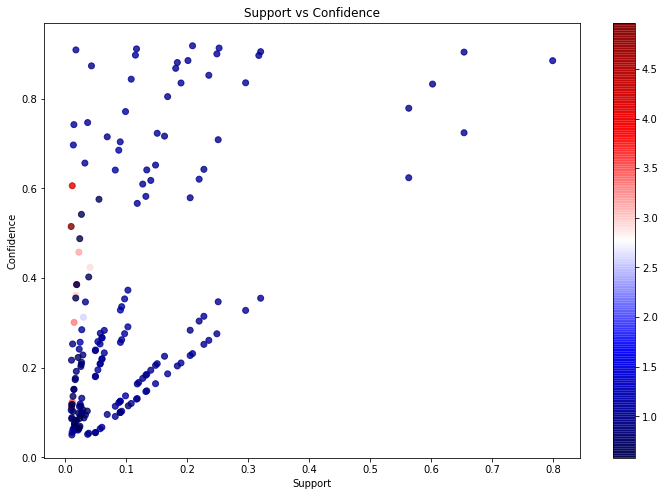

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(rules5['support'], rules5['confidence'], alpha = .8, c = rules5['lift'], cmap = 'seismic')
cbar = plt.colorbar()
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

### Function to get number of number of instances

In [19]:
rules6 = rules5[['antecedents', 'consequents','antecedent support', 
                 'support', 'confidence','lift']]

In [20]:
def get_count(i):
    x = rules6.loc[i,'antecedents']
    v, = x
    t = df3[df3[v] == True]
    y = rules6.loc[i,'consequents']
    if len(y) == 1:
        v1, = y
        c_all = t[(t[v1] == True)]
        count = len(c_all)
        return(count)
    if len(y) == 2:
        v1,v2 = y
        c_all = t[(t[v1] == True) & (t[v2] == True)]
        count = len(c_all)
        return(count)
    if len(y) == 3:
        v1,v2,v3 = y
        c_all = t[(t[v1] == True) & (t[v2] == True) & (t[v3] == True)]
        count = len(c_all)
        return(count)

In [21]:
for i in range(len(rules6)):
    cc = get_count(i)
    rules6.loc[i,'Number_of_instances'] = cc

In [22]:
rules6.tail(2)

,antecedents,consequents,antecedent support,support,confidence,lift,Number_of_instances
182,(VMail_Plan=yes),(Churn=True.),0.276628,0.024002,0.086768,0.598752,80.0
183,(Intl_Plan=yes),"(Churn=False., CustServ_Calls=2)",0.096910,0.011401,0.117647,0.583508,38.0


### Calculate the percent support and percent confidence

In [23]:
rules6 = pd.DataFrame(rules6)
rules6['support_%'] = rules6.apply(lambda row: 
                                   round(row.support * 100,3), axis = 1) 
rules6['confidence_%'] = rules6.apply(lambda row: 
                                      round(row.confidence * 100,3), axis = 1) 
rules7 = rules6[['antecedents', 'consequents','Number_of_instances',
                 'antecedent support', 'support_%', 'confidence_%','lift']]
rules7.head()

,antecedents,consequents,Number_of_instances,antecedent support,support_%,confidence_%,lift
0,(CustServ_Calls=5),"(Churn=True., Intl_Plan=no)",34.0,0.019802,1.02,51.515,4.962428
1,(Intl_Plan=yes),"(VMail_Plan=yes, Churn=True.)",36.0,0.096910,1.08,11.146,4.643498
2,(Intl_Plan=yes),"(CustServ_Calls=0, Churn=True.)",39.0,0.096910,1.17,12.074,4.374310
3,(CustServ_Calls=5),(Churn=True.),40.0,0.019802,1.20,60.606,4.182195
4,(CustServ_Calls=4),"(Churn=True., Intl_Plan=no)",64.0,0.049805,1.92,38.554,3.713908


### Association rule with the greatest lift

The rule with the greatest lift is if a customer makes 5 customer service calls than the customer is around 5 times as likely to churn and not have an international plan than the entire dataset. This information could be helpful to the bank when trying to understand what type of customers are churning.

In [24]:
rules7.loc[0,:]

antecedents                     (CustServ_Calls=5)
consequents            (Churn=True., Intl_Plan=no)
Number_of_instances                             34
antecedent support                        0.019802
support_%                                     1.02
confidence_%                                51.515
lift                                       4.96243
Name: 0, dtype: object

### Conclusion 

In [25]:
rules7.loc[3,:]

antecedents            (CustServ_Calls=5)
consequents                 (Churn=True.)
Number_of_instances                    40
antecedent support               0.019802
support_%                             1.2
confidence_%                       60.606
lift                              4.18219
Name: 3, dtype: object

Rules like the rule with the largest lift can give some useful insight into the dataset, but some other rules give a better picture into what is happening. A rule that can help the bank is rule number 4, which has customer service calls equal to five as the antecedent and a churn of true as the consequents. The lift is 4.18219, which could be viewed as a customer that makes five customer service calls is four times as likely to churn than the rest of the dataset. A rule that has a lift larger than one can be useful and give the bank information in to how customers are behaving, which could lead to less churn. 